In [63]:
#Import All relevant Packages
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re


In [64]:
accesstoken="xxxx"

accesstokensecret="xxxx"

apikey="xxxx"

apisecretkey="xxxx"

In [65]:

authenticate = tweepy.OAuthHandler(apikey,apisecretkey)
authenticate.set_access_token(accesstoken,accesstokensecret)

In [66]:
api = tweepy.API(authenticate,wait_on_rate_limit=True)

In [67]:
#Function to get the Tweets
def get_tweets(query, maxTweets = 1000): 
        # empty list to store parsed tweets 
        tweets = [] 
        sinceId = None
        max_id = -1
        tweetCount = 0
        tweetsPerQry = 100
        
        while tweetCount < maxTweets:
            if (max_id <= 0):
                  if (not sinceId):
                      new_tweets = api.search(q=query, count=tweetsPerQry)
                  else:
                      new_tweets = api.search(q=query, count=tweetsPerQry,
                                                since_id=sinceId)
            else:
                  if (not sinceId):
                      new_tweets = api.search(q=query, count=tweetsPerQry,
                                                max_id=str(max_id - 1))
                  else:
                      new_tweets = self.api.search(q=query, count=tweetsPerQry,
                                                max_id=str(max_id - 1),
                                                since_id=sinceId)
            if not new_tweets:
                print("No more tweets found")
                break
                    
            for tweet in new_tweets:
                parsed_tweet = {} 
                parsed_tweet['tweets'] = tweet.text 

                    # appending parsed tweet to tweets list 
                if tweet.retweet_count > 0: 
                        # if tweet has retweets, ensure that it is appended only once 
                  if parsed_tweet not in tweets: 
                    tweets.append(parsed_tweet) 
                  else: 
                    tweets.append(parsed_tweet) 
                        
            tweetCount += len(new_tweets)
        return tweets

In [ ]:
get_tweets("Last Debate")

In [68]:
post = get_tweets("Last Debate")

In [69]:
len(post)

908

In [70]:
#Get in a List
t = []
for i in range(0,len(post)):
  t.append(post[i]['tweets'])
  

In [71]:
df_tweet = pd.DataFrame([i for i in t],columns=['Tweet'])

In [72]:
df_tweet

,Tweet
0,"RT @StephenAtHome: Last night, it was so refre..."
1,RT @realDonaldTrump: Joe Biden was very disres...
2,RT @UROCKlive1: I've seen WAY too much video o...
3,RT @ScottBaio: Why wasn't #HunterBiden at the ...
4,"RT @KamalaHarris: Just last ​month,​ Donald Tr..."
...,...
903,RT @BuzzFeedNews: On today's episode of @NewsO...
904,RT @VickyPJWard: “Donald Trump's more sedate d...
905,RT @TheOfficerTatum: Who won last night's debate?
906,RT @UROCKlive1: I've seen WAY too much video o...


In [73]:
##text cleaning
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [90]:
def clean_text(text):
  stop_words = stopwords.words('english')
  stop_words.extend(['last','night','debate','presidential','biden','trump'])
  text = re.sub(r'@[a-zA-Z0-9]+','',text)
   #removed @
  text = re.sub(r'#','',text)
  text = re.sub(r'\.','',text)
  text = re.sub(r':','',text)
  text = re.sub(r'RT[\s]+','',text)
  text = re.sub(r'https?:\/\/\S+','',text)
  filtered_sentence = [word.lower() for word in nltk.word_tokenize(text) if  word not in set(stop_words)]
  return " ".join(filtered_sentence)
  return text

In [77]:
df_tweet['Tweet'] = df_tweet['Tweet'].apply(clean_text)

In [78]:
df_tweet

,Tweet
0,"last night , refreshing see actual next year ,..."
1,joe biden disrespectful president obama night ...
2,"i 've seen way much video trump night , one pl..."
3,why n't hunterbiden night support dad ? 🤔
4,"just ​month , ​ donald trump stood a​ stage ​a..."
...,...
903,"on today 's episode , stop discuss night 's mi..."
904,“ donald trump 's sedate performance thursday ...
905,who night 's ?
906,"i 've seen way much video trump night , one pl..."


In [79]:
#remove duplicates in our dataframe since many tweets are retweeted 
df_tweet = df_tweet.drop_duplicates(subset=['Tweet'], keep="last")


In [80]:
df_tweet.count

<bound method DataFrame.count of                                                  Tweet
374  one thing i think people fail focus night ’ bi...
428  _pettigrew if want know whether ’ veered towar...
589  so wants know think nights ? and feed insatiab...
854  last night ’ gave lot fact check here ’ truth ...
857  it kind amazing trump pretended time wants rai...
858  last night really good craziest part trump ask...
865  this picture taken night ’ it clearly shows ne...
866  the president , per usual , spent lot time tra...
871  just ​month , ​ donald trump stood a​ stage ​a...
874  not long ago , donald trump set nielsen record...
876  we survived now let ’ vote , continue larger w...
877  kentucky bottom 5 states almost every measurab...
882  the character country ballot last night ’ show...
883  watch tonight 's `` securing america '' via co...
884  hey new york times , article fact checks night...
889          why n't hunterbiden night support dad ? 🤔
894  last night , refreshing see

In [81]:
#Use Sentiment analysis by either of the below methods
# a)NLTK SentimentIntensityAnalyzer 
# b)NLTK TExtBlob
from textblob import TextBlob

#Identifying Sentiment type
overall reaction, it can be positive, negative or neutral.

In [82]:

def subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def polarity(text):
  return TextBlob(text).sentiment.polarity

In [83]:
df_tweet['Subjectivity'] = df_tweet['Tweet'].apply(subjectivity)
df_tweet['Polarity'] = df_tweet['Tweet'].apply(polarity)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [84]:
df_tweet.head()

,Tweet,Subjectivity,Polarity
374,one thing i think people fail focus night ’ bi...,0.300000,-0.500000
428,_pettigrew if want know whether ’ veered towar...,0.535714,0.285714
589,so wants know think nights ? and feed insatiab...,0.100000,0.200000
854,last night ’ gave lot fact check here ’ truth ...,0.066667,0.000000
857,it kind amazing trump pretended time wants rai...,0.633333,0.466667


In [85]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

#sentiment analysis with  VADER (Valence Aware Dictionary and sEntiment Reasoner)
def sentiment_using_Analyzer(text):
    s = SentimentIntensityAnalyzer()
    polarity_scores = s.polarity_scores(text)
    if polarity_scores['neg'] > polarity_scores['pos']:
        return 'negative'
    else:
        return 'positive'
#sentiment analysis with  TextBlob
def sentiment_using_textblob(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity >= 0:
        return 'positive'
    else: 
        return 'negative'

Visualize Using Word Cloud


In [86]:
from wordcloud import WordCloud
import nltk
import matplotlib.pyplot as plt

In [87]:
all_words = ' '.join(w for w in df_tweet['Tweet'])

In [88]:
wordCloud = WordCloud(width = 500,height = 300 , random_state = 21 ,max_words=40, max_font_size = 119).generate(all_words)

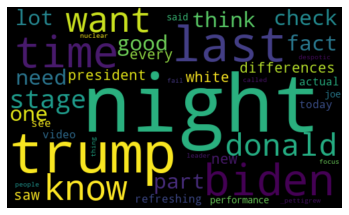

In [89]:
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [91]:
## Add Analysis column based on Sentiment for each tweet 
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score ==0:
    return 'Neutral'
  else:
    return 'Positive'

In [92]:
df_tweet['Analysis'] = df_tweet['Polarity'].apply(getAnalysis)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [93]:
df_tweet

,Tweet,Subjectivity,Polarity,Analysis
374,one thing i think people fail focus night ’ bi...,0.300000,-0.500000,Negative
428,_pettigrew if want know whether ’ veered towar...,0.535714,0.285714,Positive
589,so wants know think nights ? and feed insatiab...,0.100000,0.200000,Positive
854,last night ’ gave lot fact check here ’ truth ...,0.066667,0.000000,Neutral
857,it kind amazing trump pretended time wants rai...,0.633333,0.466667,Positive
858,last night really good craziest part trump ask...,0.333333,0.350000,Positive
865,this picture taken night ’ it clearly shows ne...,0.691667,0.050000,Positive
866,"the president , per usual , spent lot time tra...",0.250000,-0.050000,Negative
871,"just ​month , ​ donald trump stood a​ stage ​a...",0.000000,0.000000,Neutral
874,"not long ago , donald trump set nielsen record...",0.233333,0.012500,Positive


In [94]:
#Sort Tweets wrt Polarity
df_sorted = df_tweet.sort_values(by=['Polarity'])

print(df_sorted)


                                                 Tweet  ...  Analysis
374  one thing i think people fail focus night ’ bi...  ...  Negative
866  the president , per usual , spent lot time tra...  ...  Negative
905                                     who night 's ?  ...   Neutral
904  “ donald trump 's sedate performance thursday ...  ...   Neutral
903  on today 's episode , stop discuss night 's mi...  ...   Neutral
902  so needed four days prepare today drove blocks...  ...   Neutral
896  this prediction election the man saw night ’ s...  ...   Neutral
889          why n't hunterbiden night support dad ? 🤔  ...   Neutral
883  watch tonight 's `` securing america '' via co...  ...   Neutral
876  we survived now let ’ vote , continue larger w...  ...   Neutral
907  joe biden disrespectful president obama night ...  ...   Neutral
871  just ​month , ​ donald trump stood a​ stage ​a...  ...   Neutral
854  last night ’ gave lot fact check here ’ truth ...  ...   Neutral
874  not long ago , 

In [95]:
df_sorted = df_sorted.reset_index(drop = 'true')

In [96]:
df_sorted

,Tweet,Subjectivity,Polarity,Analysis
0,one thing i think people fail focus night ’ bi...,0.300000,-0.500000,Negative
1,"the president , per usual , spent lot time tra...",0.250000,-0.050000,Negative
2,who night 's ?,0.000000,0.000000,Neutral
3,“ donald trump 's sedate performance thursday ...,0.000000,0.000000,Neutral
4,"on today 's episode , stop discuss night 's mi...",0.000000,0.000000,Neutral
5,so needed four days prepare today drove blocks...,0.000000,0.000000,Neutral
6,this prediction election the man saw night ’ s...,1.000000,0.000000,Neutral
7,why n't hunterbiden night support dad ? 🤔,0.000000,0.000000,Neutral
8,watch tonight 's `` securing america '' via co...,0.000000,0.000000,Neutral
9,"we survived now let ’ vote , continue larger w...",0.500000,0.000000,Neutral


In [97]:
df_tweet['Analysis'].value_counts()

Positive    13
Neutral     11
Negative     2
Name: Analysis, dtype: int64

In [98]:
# Print Positive Tweets
count = 1
neg = 0
pos = 0

for i in range(0,df_sorted.shape[0]):
  if df_sorted['Analysis'][i] == 'Positive':
    print(str(count),' '+df_sorted['Tweet'][i])
    pos +=1
  else:
    neg +=1
  count +=1

14  not long ago , donald trump set nielsen records time stepped onto stage no last night 's ratings t…
15  this picture taken night ’ it clearly shows need know vast differences t…
16  the character country ballot last night ’ showed choice clear ev…
17  new video the analysis need , simply quotes movie `` network '' “ well i ’ tell happened i…
18  hey new york times , article fact checks night 's bit biased untruthful https//t…
19  last night , refreshing see actual next year , would refreshing see actual presiden…
20  kentucky bottom 5 states almost every measurable economic quality-of-life variable every clip i saw the…
21  so wants know think nights ? and feed insatiable ego , dir…
22  post i thought strong night stark differences biden trump free enterprise v…
23  _pettigrew if want know whether ’ veered toward right decade terms considered ‘ reas…
24  last night really good craziest part trump asked biden wanted get rid oil in…
25  i 've seen way much video trump night , one pla

Text(0, 0.5, 'Subjectivity')

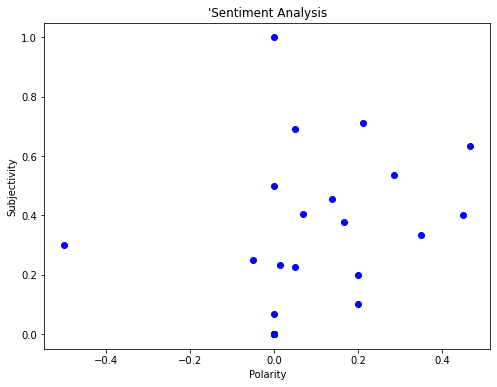

In [99]:
#plot the polarity subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df_tweet.shape[0]):
  plt.scatter(df_sorted['Polarity'][i],df_sorted['Subjectivity'][i],color = 'blue')
plt.title("'Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")